In [1]:
from pprint import pprint
import time
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from config import rapidapi_key
import datetime
import math

# Unorganized Data

In [2]:
#reading in all covid19 data

time_series_ncov_Confirmed =pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Confirmed.csv')
time_series_ncov_Deaths = pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Deaths.csv')
time_series_ncov_Recovered =pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Recovered.csv')

In [3]:
#Removing Unecessary Columns in each data frame
time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop(columns =['Province/State'])
time_series_ncov_Deaths =time_series_ncov_Deaths.drop(columns =['Province/State'])
time_series_ncov_Recovered =time_series_ncov_Recovered.drop(columns =['Province/State'])
time_series_ncov_Confirmed.head()

,Country/Region,Lat,Long,Date,Value
0,#country+name,#geo+lat,#geo+lon,#date,#affected+infected+value+num
1,Afghanistan,33.0,65.0,2020-03-26,94
2,Afghanistan,33.0,65.0,2020-03-25,84
3,Afghanistan,33.0,65.0,2020-03-24,74
4,Afghanistan,33.0,65.0,2020-03-23,40


In [4]:
#Removing unecessary rows in each data set

time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop([0], axis = 0)
time_series_ncov_Deaths =time_series_ncov_Deaths.drop([0], axis = 0)
time_series_ncov_Recovered =time_series_ncov_Recovered.drop([0], axis = 0)
time_series_ncov_Deaths.head()



# Changing all value columns to numeric for analysis
time_series_ncov_Confirmed["Value"] = pd.to_numeric(time_series_ncov_Confirmed["Value"])
time_series_ncov_Deaths["Value"] = pd.to_numeric(time_series_ncov_Deaths["Value"])
time_series_ncov_Recovered["Value"] = pd.to_numeric(time_series_ncov_Recovered["Value"])


time_series_ncov_Confirmed["Date"] = pd.to_datetime(time_series_ncov_Confirmed["Date"])
time_series_ncov_Deaths["Date"] = pd.to_datetime(time_series_ncov_Deaths["Date"])
time_series_ncov_Recovered["Date"] = pd.to_datetime(time_series_ncov_Recovered["Date"])

time_series_ncov_Confirmed.dtypes

#Renaming value columns to be easier to analyze

time_series_ncov_Confirmed= time_series_ncov_Confirmed.rename(columns ={'Value':'Confirmed Cases'})
time_series_ncov_Deaths= time_series_ncov_Deaths.rename(columns ={'Value':'Deaths'})
time_series_ncov_Recovered= time_series_ncov_Recovered.rename(columns ={'Value':'Recoveries'})
time_series_ncov_Confirmed.head()

,Country/Region,Lat,Long,Date,Confirmed Cases
1,Afghanistan,33.0,65.0,2020-03-26,94
2,Afghanistan,33.0,65.0,2020-03-25,84
3,Afghanistan,33.0,65.0,2020-03-24,74
4,Afghanistan,33.0,65.0,2020-03-23,40
5,Afghanistan,33.0,65.0,2020-03-22,40


In [5]:
#Grouping all dataframes by country/region and the date to get total values for each data set

time_series_nconv_Confirmed = time_series_ncov_Confirmed.groupby(['Country/Region','Date']).sum()['Confirmed Cases']
time_series_nconv_Deaths = time_series_ncov_Deaths.groupby(['Country/Region','Date']).sum()['Deaths']
time_series_nconv_Recovered = time_series_ncov_Recovered.groupby(['Country/Region','Date']).sum()['Recoveries']

confirmed_all = pd.DataFrame({
    "Confirmed Cases": time_series_nconv_Confirmed,
    "Deaths": time_series_nconv_Deaths,
    "Recoveries": time_series_nconv_Recovered
})
confirmed_all.head()

Confirmed Cases  Deaths  Recoveries
Country/Region Date                                           
Afghanistan    2020-01-22                0       0           0
               2020-01-23                0       0           0
               2020-01-24                0       0           0
               2020-01-25                0       0           0
               2020-01-26                0       0           0

In [6]:
#italy_df = confirmed_all.loc["Italy"]


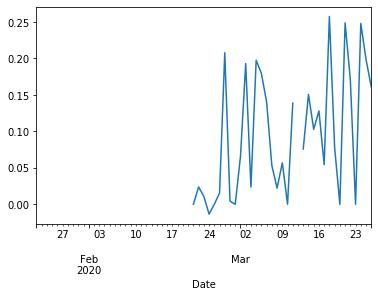

In [7]:
italy_df = confirmed_all.loc["Italy"]

confirm_count = 0
death_count = 0
recovery_count = 0

new_confirmed_cases =[]
new_deaths =[]
new_recoveries = []

confirmed_cases_list = italy_df['Confirmed Cases'].to_list()
deaths_list = italy_df['Deaths'].to_list()
recoveries_list = italy_df['Recoveries'].to_list()

for i in confirmed_cases_list:
    new_confirm = i-confirm_count
    new_confirmed_cases.append(new_confirm)
    confirm_count = i

for k in deaths_list:
    new_dead = k-death_count
    new_deaths.append(new_dead)
    death_count = k

for j in recoveries_list:
    new_recover = j-recovery_count
    new_recoveries.append(new_recover)
    recovery_count = j


italy_df["New Confirmed Cases"]= new_confirmed_cases
italy_df["New Deaths"]= new_deaths
italy_df["New Recoveries"]= new_recoveries
italy_df["Recovery Rate"] = italy_df["New Recoveries"] / italy_df["New Confirmed Cases"]

italy_df.head()
italy_df["Recovery Rate"].plot()
# italy_df["New Confirmed Cases"].plot()
plt.show()

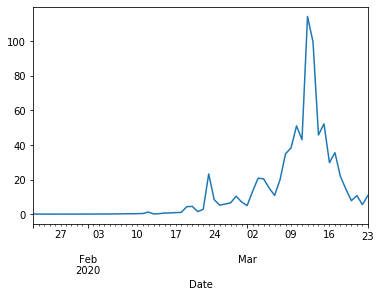

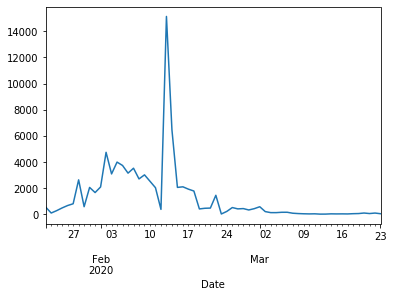

In [76]:
china_df = confirmed_all.loc["China"]

confirm_count = 0
death_count = 0
recovery_count = 0

new_confirmed_cases =[]
new_deaths =[]
new_recoveries = []

confirmed_cases_list = china_df['Confirmed Cases'].to_list()
deaths_list = china_df['Deaths'].to_list()
recoveries_list = china_df['Recoveries'].to_list()

for i in confirmed_cases_list:
    new_confirm = i-confirm_count
    new_confirmed_cases.append(new_confirm)
    confirm_count = i

for k in deaths_list:
    new_dead = k-death_count
    new_deaths.append(new_dead)
    death_count = k

for j in recoveries_list:
    new_recover = j-recovery_count
    new_recoveries.append(new_recover)
    recovery_count = j

china_df["New Confirmed Cases"]= new_confirmed_cases
china_df["New Deaths"]= new_deaths
china_df["New Recoveries"]= new_recoveries
china_df["Recovery Rate"] = china_df["New Recoveries"] / china_df["New Confirmed Cases"]

china_df["Recovery Rate"].plot()
# china_df["New Confirmed Cases"].plot()
plt.show()
china_df["New Confirmed Cases"].plot()
plt.show()
# china_df["New Confirmed Cases"]

In [77]:
us_df = confirmed_all.loc["US"]

confirm_count = 0
death_count = 0
recovery_count = 0

new_confirmed_cases =[]
new_deaths =[]
new_recoveries = []

confirmed_cases_list = us_df['Confirmed Cases'].to_list()
deaths_list = us_df['Deaths'].to_list()
recoveries_list = us_df['Recoveries'].to_list()

for i in confirmed_cases_list:
    new_confirm = i-confirm_count
    new_confirmed_cases.append(new_confirm)
    confirm_count = i

for k in deaths_list:
    new_dead = k-death_count
    new_deaths.append(new_dead)
    death_count = k

for j in recoveries_list:
    new_recover = j-recovery_count
    new_recoveries.append(new_recover)
    recovery_count = j

us_df["New Confirmed Cases"]= new_confirmed_cases
us_df["New Deaths"]= new_deaths
us_df["New Recoveries"]= new_recoveries

# us_df["New Deaths"].plot()
# us_df["New Confirmed Cases"].plot()
# plt.show()



In [98]:
# confirmed_group=pd.DataFrame({
#     #'x': confirmed_all.loc["Italy"]['Confirmed Cases'].index,
#     'Italy': confirmed_all.loc["Italy"]["Confirmed Cases"], 
#     'US': confirmed_all.loc["US"]["Confirmed Cases"],
#     'China': confirmed_all.loc["China"]["Confirmed Cases"]
# })

# confirmed_group.plot()
# #ax.xaxis.set_major_locator(months)
# #ax.xaxis.set_major_formatter(years_fmt)
# plt.show()
# #plt.plot('x','y1', data = df, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)



In [99]:
# death_group=pd.DataFrame({
#     #'x': confirmed_all.loc["Italy"]['Confirmed Cases'].index,
#     'Italy': confirmed_all.loc["Italy"]["Deaths"], 
#     'US': confirmed_all.loc["US"]["Deaths"],
#     'China': confirmed_all.loc["China"]["Deaths"]
# })

# death_group.plot()
# plt.show()

In [100]:
# death_group=pd.DataFrame({
#     #'x': confirmed_all.loc["Italy"]['Confirmed Cases'].index,
#     'Italy': confirmed_all.loc["Italy"]["Deaths"], 
#     'US': confirmed_all.loc["US"]["Deaths"],
#     'China': confirmed_all.loc["China"]["Deaths"]
# })

# death_group.plot()
# plt.show()

In [101]:
# recoveries_group=pd.DataFrame({
#     #'x': confirmed_all.loc["Italy"]['Confirmed Cases'].index,
#     'Italy': confirmed_all.loc["Italy"]["Recoveries"], 
#     'US': confirmed_all.loc["US"]["Recoveries"],
#     'China': confirmed_all.loc["China"]["Recoveries"]
# })

# recoveries_group.plot()
# plt.show()

# Italian Market

In [86]:
italy_market_df = pd.read_csv("../italy_index/FTSE Italia All Share Historical Data.csv")

In [102]:

italy_market_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Timestamp
0,2020-03-20,17171.55,17209.93,17628.87,17047.73,1500000000,1.85,1584662400
1,2020-03-19,16859.82,16814.38,17240.13,16438.49,1270000000,2.27,1584576000
2,2020-03-18,16486.21,16372.27,16785.57,16149.48,992760000,-1.17,1584489600
3,2020-03-17,16680.56,16850.34,17238.59,16065.72,1400000000,1.96,1584403200
4,2020-03-16,16360.04,17130.96,17130.96,15498.19,1540000000,-6.06,1584316800


In [87]:
italy_market_df["Date"]=pd.to_datetime(italy_market_df["Date"])

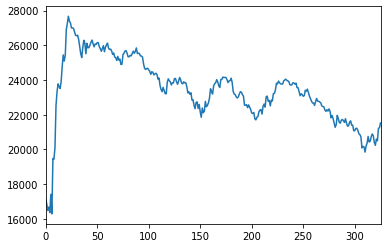

In [88]:
italy_market_df["Price"].plot()
plt.show()

# Chinese Market

In [89]:
curr_time = int(time.time())
#prior_year = curr_time-(60*60*24*365)
prior_year = 1543622400  # unix for December 01,2018
ticker_symbol = "000001.SS"

In [90]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":"1575176400","to":"1585108800","events":"div","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "b477e42517mshf0183273bba2e47p1544cbjsnc7d400ac9422"
    }

response2 = requests.request("GET", url, headers=headers, params=querystring)



In [91]:
response2

<Response [200]>

In [92]:
timestamp = response2.json()['chart']['result'][0]['timestamp']
year_close = response2.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response2.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response2.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response2.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

sseDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
sse_df = pd.DataFrame(sseDict)

sse_df['Change %'] = (sse_df['Close']-sse_df['Open'])/sse_df['Open']

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(sse_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(sse_df['Timestamp']))]
sse_df['Date'] = convert_date

sse_df['Last Year'] =[datetime.datetime.strptime(sse_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(sse_df['Date']))]
sse_df

,Timestamp,Open,Close,Volume,Adjclose,Change %,Date,Last Year
0,1575250200,2874.449951,2875.810059,1.288000e+05,2875.810059,0.000473,2019-12-02,2018-12-02
1,1575336600,2869.879883,2884.699951,1.238000e+05,2884.699951,0.005164,2019-12-03,2018-12-03
2,1575423000,2876.907959,2878.115967,1.255000e+05,2878.115967,0.000420,2019-12-04,2018-12-04
3,1575509400,2886.516113,2899.468994,1.432000e+05,2899.468994,0.004487,2019-12-05,2018-12-05
4,1575595800,2902.278076,2912.013916,1.341000e+05,2912.013916,0.003355,2019-12-06,2018-12-06
...,...,...,...,...,...,...,...,...
71,1584581400,2719.406006,2702.129883,3.023000e+05,2702.129883,-0.006353,2020-03-19,2019-03-20
72,1584667800,2727.019043,2745.617920,2.520000e+05,2745.617920,0.006820,2020-03-20,2019-03-21
73,1584927000,2677.590088,2660.169922,2.498000e+05,2660.169922,-0.006506,2020-03-23,2019-03-24
74,1585013400,2703.019043,2722.437988,2.570000e+05,2722.437988,0.007184,2020-03-24,2019-03-25


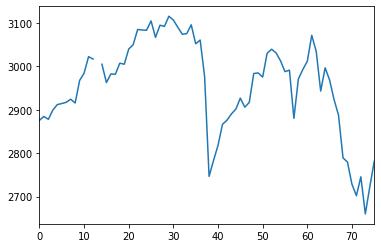

In [93]:
sse_df["Close"].plot()